In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

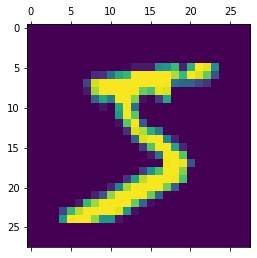

In [ ]:
plt.matshow(X_train[0])

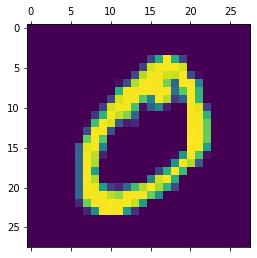

In [ ]:
plt.matshow(X_train[1])

In [ ]:
y_train[1]

0

In [ ]:
X_train.shape

(60000, 28, 28)

Scaling Dataset

In [ ]:
X_train = X_train/255
X_test = X_test/255

Flatten the image matrix

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Building The Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4682 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9253


Evaluating the model

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9241


[0.2690894305706024, 0.9240999817848206]

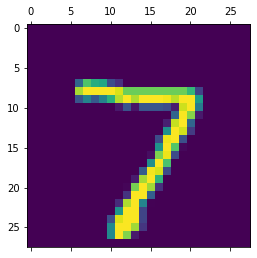

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([2.3498459e-02, 5.5380099e-07, 6.5451503e-02, 9.5755750e-01,
       3.1782510e-03, 9.1644742e-02, 1.6885296e-06, 9.9978775e-01,
       1.3012129e-01, 6.1629206e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

7

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

Confusion Matrix

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,   11,  928,   14,    8,    2,   11,   11,   39,    2],
       [   3,    1,   21,  923,    0,   19,    2,   12,   24,    5],
       [   1,    2,    5,    2,  927,    0,    9,    4,   10,   22],
       [  10,    3,    7,   41,   11,  761,   11,    6,   38,    4],
       [  12,    3,    8,    1,    7,   14,  908,    2,    3,    0],
       [   1,    8,   26,    5,    7,    0,    0,  957,    2,   22],
       [   6,   15,    7,   20,    9,   22,    8,   10,  873,    4],
       [  11,    7,    1,   12,   49,    5,    0,   29,   12,  883]],
      dtype=int32)>

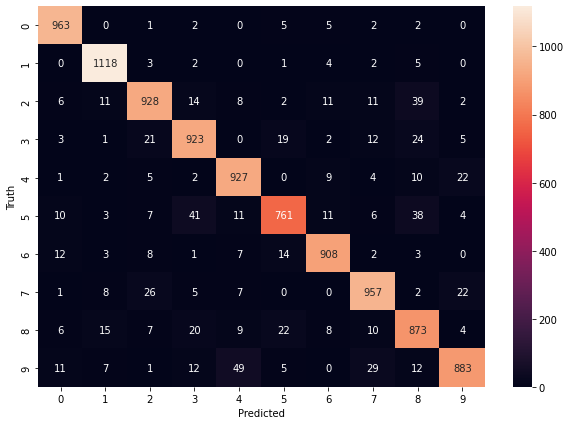

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Introducing Hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2754 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1227 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0854 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0667 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0526 - accuracy: 0.9841


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9740


[0.0773656964302063, 0.9739999771118164]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

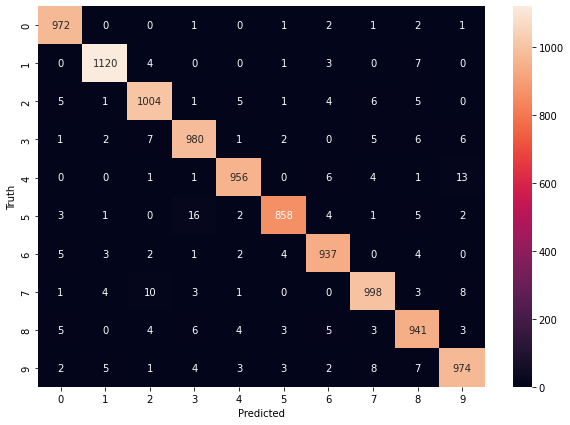

In [ ]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2742 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1234 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0867 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0670 - accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0426 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.019

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9786


[0.08019056171178818, 0.978600025177002]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

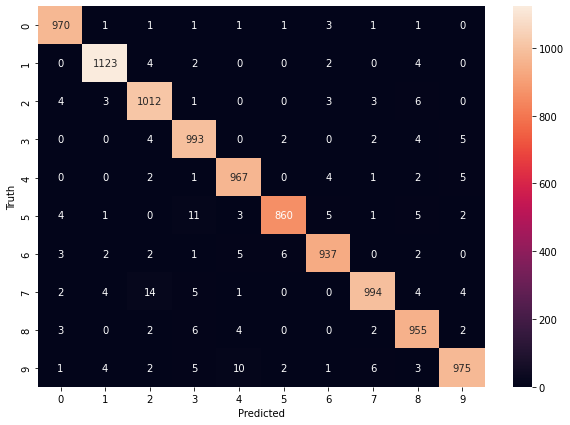

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Introducing flatten layer in the Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2764 - accuracy: 0.9232
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1285 - accuracy: 0.9618
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0881 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0531 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0418 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.019

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9762


[0.08279580622911453, 0.9761999845504761]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

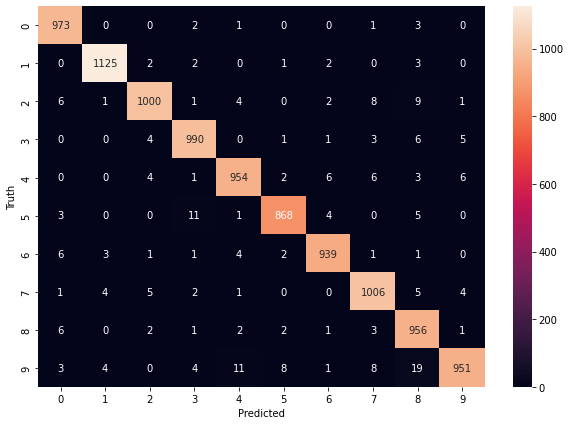

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')